<a href="https://colab.research.google.com/github/Worlddatascience/DataScienceCohort/blob/master/7_How_to_Backtest_a_Simple_Moving_Average_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anade Davis - Financial Data Scientist - [Linkedin](https://https://www.linkedin.com/in/anadedatascientist/)

**In this Model I will be creating A Backtesting Model to test the Simple Moving Average Strategy Investors use with the WCLD (WisdomTree Cloud Computing) ETF**

"Backtesting is a term used in modeling to refer to testing a predictive model on historical data. Backtesting is a type of retrodiction, and a special type of cross-validation applied to previous time period." ~ Wikipedia


References:

https://github.com/PacktPublishing/Python-for-Finance-Cookbook/blob/master/Chapter%2002/chapter_2.ipynb

https://www.backtrader.com/docu/cerebro/

https://www.olymptradewiki.com/sma-options-trading-strategy/

https://matplotlib.org/3.3.1/tutorials/colors/colormap-manipulation.html




In [1]:
!pip install backtrader #Code to Install Backtrader

In [2]:
pip install yfinance #Code to install yfinance

In [3]:
from datetime import datetime #Code to display time
import pandas as pd #Used for high level Data Indexing processes
import yfinance as yf #Code to import Yahoo Finance API
import backtrader as bt #A Backtesting Library for Quantitative Analysis 

In [4]:
#Create a Class
class SmaSignal(bt.Signal): #SmaSignal (Simple Moving Average Signal)
    params = (('period', 31), ) #We set parameters for a period of 30 days
   
    def __init__(self): #A Class Function used in correlation with above function considered a Object Constructor to work with our Class
        self.lines.signal = self.data - bt.ind.SMA(period=self.p.period) #The code to generate Buy,Sell Signals/Indicators

In [5]:
#The code to pull data from Yahoo Finance API
EOSSTOCK= bt.feeds.YahooFinanceData(dataname='EOS',fromdate=datetime(2018, 9, 30),todate=datetime(2020, 9, 30))
#We look at EOS returns over a year

In [6]:
#The code to setup our Backtest
#Cerebro is a powerful backtest code used for Algorithmic Trading Models
cerebro = bt.Cerebro(stdstats = False)
cerebro.adddata(EOSSTOCK)
cerebro.broker.setcash(100000.0) #We create a fake cash amount of $100000 to start with
cerebro.add_signal(bt.SIGNAL_LONG, SmaSignal) #Long indication if the close price is above a Simple Moving Average
cerebro.add_signal(bt.SIGNAL_SHORT, SmaSignal)#We could also use short (Indicates price is below a Simple Moving Average)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)

In [7]:
print(f'Starting Portfolio Value: {cerebro.broker.getvalue():.2f}')


Starting Portfolio Value: 100000.00


In [8]:
# Add a FixedSize sizer according to the stake
cerebro.addsizer(bt.sizers.FixedSize, stake=10) #Amount of Shares we buy

# Set the commission if you use a brokerage that requires commission (becoming a thing of the past)
#cerebro.broker.setcommission(commission=0.0)

In [9]:
cerebro.run() #Code to process the strategy 


<IPython.core.display.Javascript object>

[[<Figure size 1152x648 with 4 Axes>]]

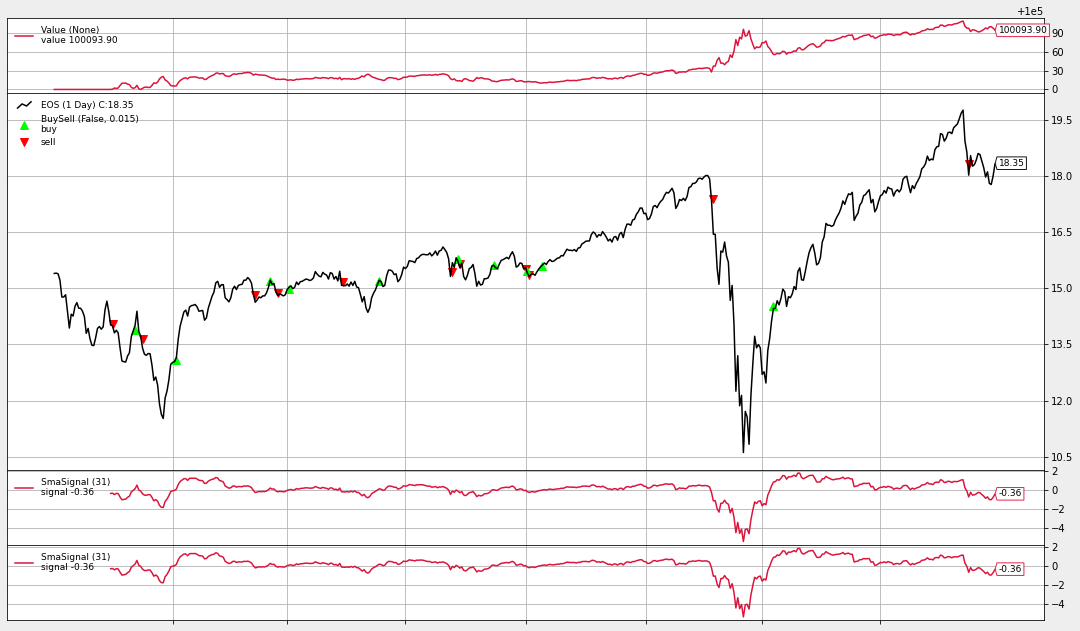

In [10]:
#This entire code block is needed to display Simple Moving Average plots
#This otherwise would not take so much code but it seems to only work in Google Colab this way
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams #Creates parameters for our plot
rcParams['figure.figsize'] = 16,9 #size
rcParams['figure.facecolor'] = '#eeeeee' #Color scheme
plt.plot() #The Plot Code
plt.close()
cerebro.plot(iplot=True, volume=False)

In [11]:
print(f'Final Portfolio Value: {cerebro.broker.getvalue():.2f}')


Final Portfolio Value: 100093.90


With this Strategy we only make $93 unless we trade on a higher Margin!
